<a href="https://github.com/DavidGomezCamargo/CS634-Data-Mining/blob/1ccd70d325b1803023737b61fe8ca70b44e2cfad/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Probability Assignment

To get full credit in this assignment you need to use `numpy` libraries  and include adequate explanation of the code in either markdown cells or inline code comments. Sometimes you need to type equations - type equations in Latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.



---



## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

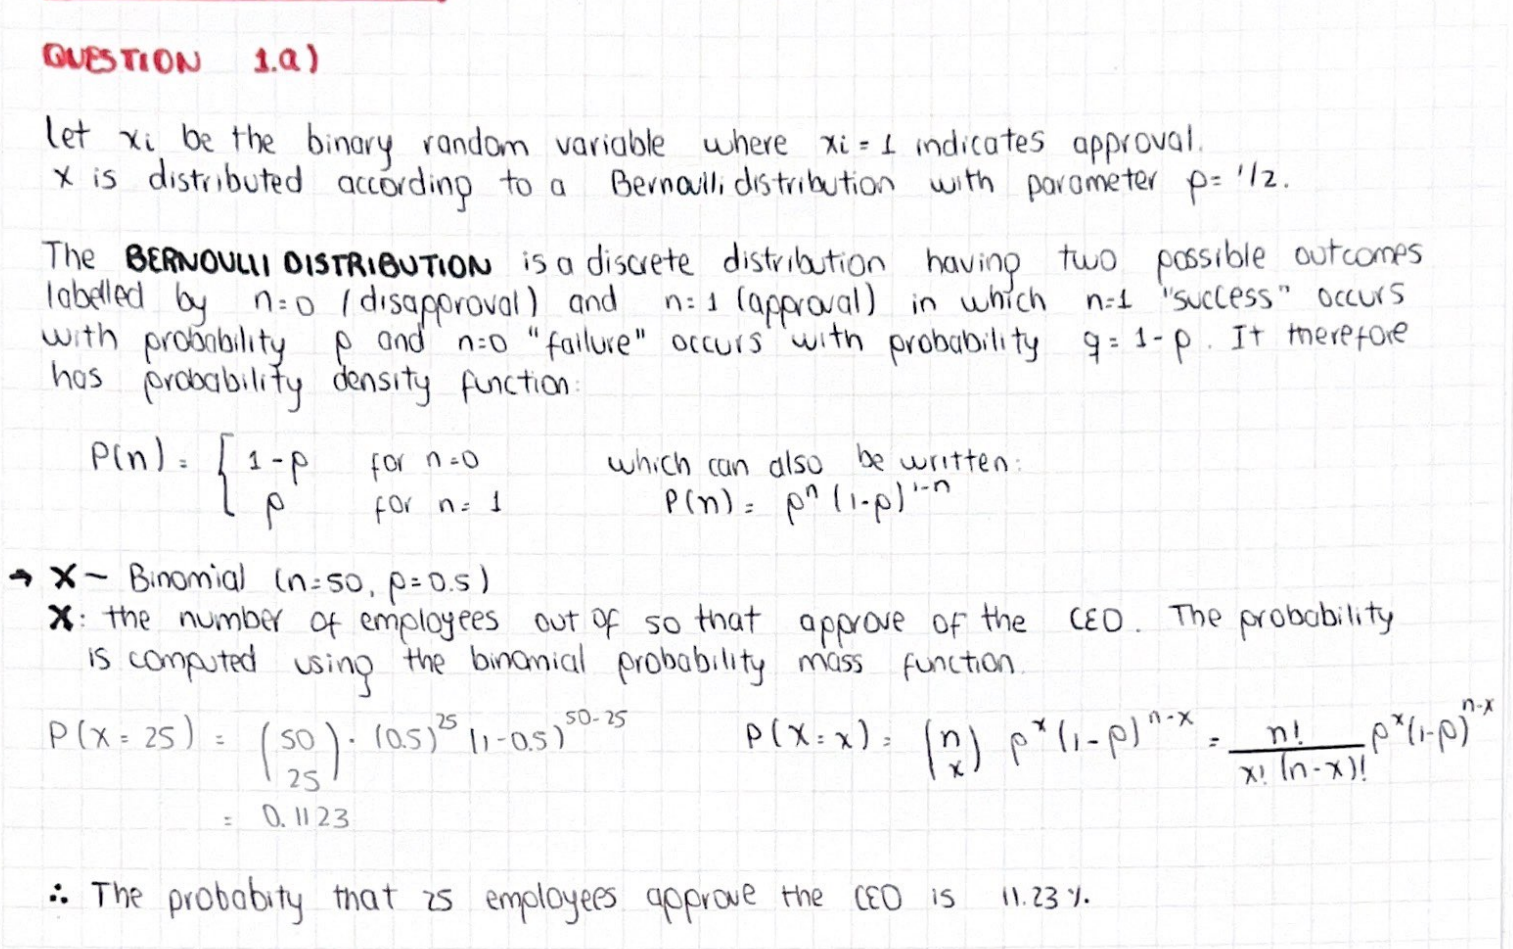

In [ ]:
# X is the number of employees out of 50 that approve of the CEO

import numpy as np
n = 50
p = 0.5

value = np.math.comb(n, 25) * (p ** 25) * ((1 - p)**(n - 25))
print("The probability that 25 employees approve the CEO is", "{:.2%}".format(value))

The probability that 25 employees approve the CEO is 11.23%


## Question 1b (15 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?

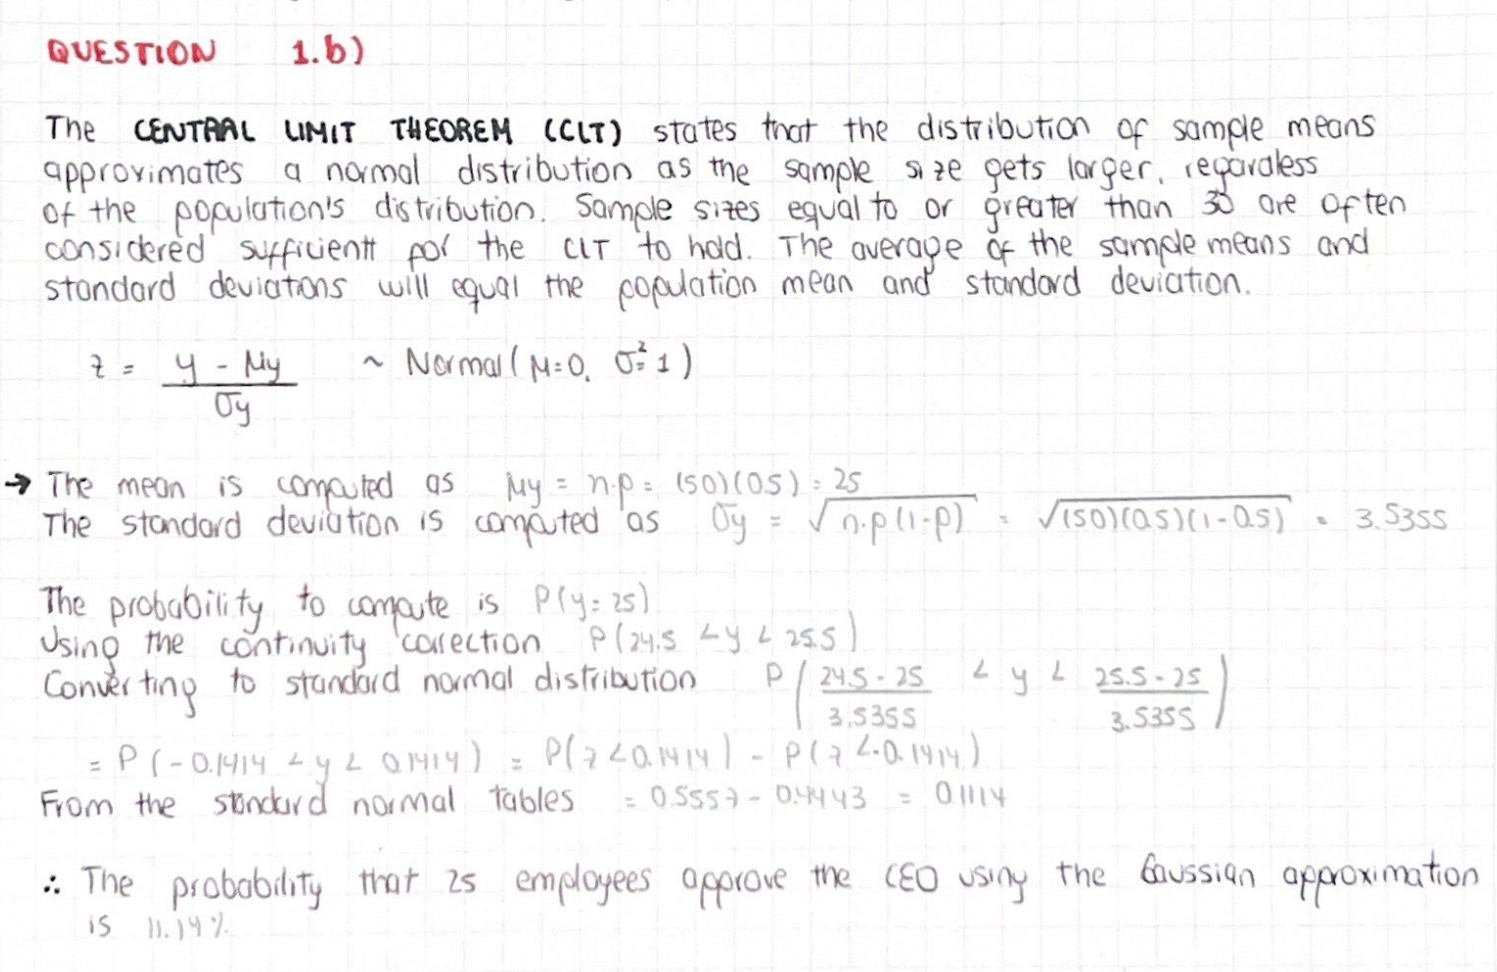



---



## Question 2 (25 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

To calculate the probability of a specific sequence of the numbers on drawn balls being 0011, we can multiply the probabilities of selecting each ball in the sequence:

The first ball can either come from Urn 0 (if the outcome is H) or from Urn 1 (if the outcome is T).

If the first urn selected is Urn 0, the probability of obtaining the sequence 0011 is:

```
P(0011) = P(0 | Urn_0) * P(0 | Urn_0) * P(1 | Urn_0) * P(1 | Urn_1)
P(0011) = (1/3) * (1/3) * (2/3) * (1/6)
P(0011) = 1/81
```
If the first urn selected is Urn 1, the probability of obtaining the sequence 0011 is:

```
P(0011) = P(0 | Urn_1) * P(0 | Urn_0) * P(1 | Urn_0) * P(1 | Urn_1)
P(0011) = (5/6) * (1/3) * (2/3) * (1/6)
P(0011) = 5/162
```

Therefore, the total probability of obtaining the sequence 0011 is:

```
P(0011) = P(Urn_0) * (1/81) + P(Urn_1) * (5/162)
P(0011) = (1/2) * (1/81) + (1/2) * (5/162)
P(0011) = 1/162 + 5/324
P(0011) = 7/324
```
Therefore, the probability of a specific sequence of the numbers on drawn balls being 0011 is 2.16%



---



## Question 3 (25 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


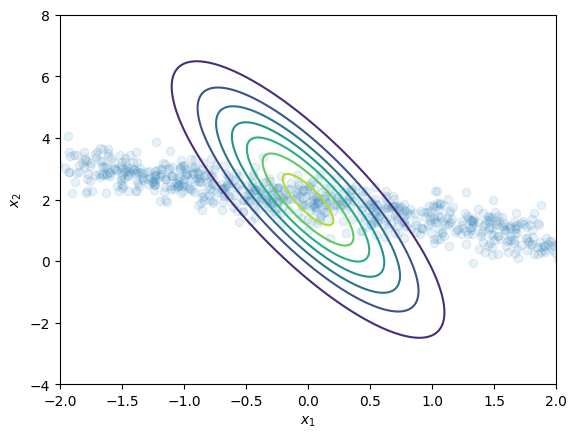

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Defining the Mean and Covariance Matrix
mean = np.array([0, 2])
covariance = np.array([[0.3, -1], [-1, 5]])

# Using Cholesky Decomposition to generate samples
chol = np.linalg.cholesky(covariance)
samples = np.random.randn(1000, 2).dot(chol) + mean

# Ploting the samples in a scatter plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.1)

# Overlaying the contour of the distribution
x, y = np.mgrid[-4:4:.01, -4:12:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mean, covariance)
plt.contour(x, y, rv.pdf(pos))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis([-2, 2, -4, 8])
plt.show()

## Question 4 (25 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


This code first uses the `kaggle` API to download the dataset, then it plots the histogram of the number of cyclists crossing the Brooklyn bridge per day using `seaborn`'s `histplot` function. The mean of the observed counts is calculated and used to generate the simulated counts using `numpy`'s `random.poisson` function. The histogram of the simulated counts is also plotted for comparison.

In [ ]:
# {"username":"davidgomezcamargo","key":"14b174c2820e62e06affaaf6a040ddd4"}

# Downloading data using Kaggle API.
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings?resource=download")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./nyc-east-river-bicycle-crossings" (use force=True to force download)


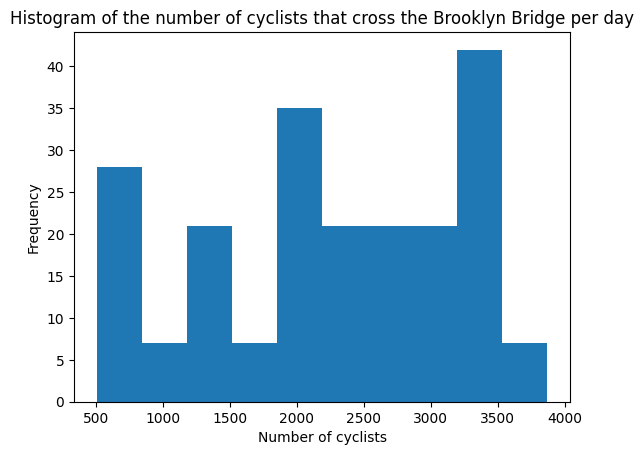

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Downloading the dataset using Kaggle API and plotting the histogram of number of cyclists

data = pd.read_csv("/content/nyc-east-river-bicycle-crossings/nyc-east-river-bicycle-counts.csv")
plt.hist(data['Brooklyn Bridge'], 10)
plt.title("Histogram of the number of cyclists that cross the Brooklyn Bridge per day")
plt.xlabel("Number of cyclists")
plt.ylabel("Frequency")
plt.show()

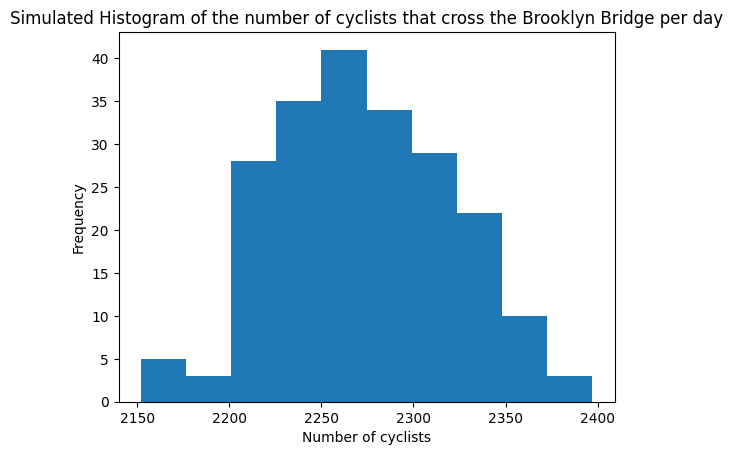

In [ ]:
# 2. Simulating the number of cyclists using Poisson distribution (210 examples)

mean = np.mean(data['Brooklyn Bridge'])
simulated_counts = np.random.poisson(mean, len(data))
plt.hist(simulated_counts, 10)
plt.title("Simulated Histogram of the number of cyclists that cross the Brooklyn Bridge per day")
plt.xlabel("Number of cyclists")
plt.ylabel("Frequency")
plt.show()

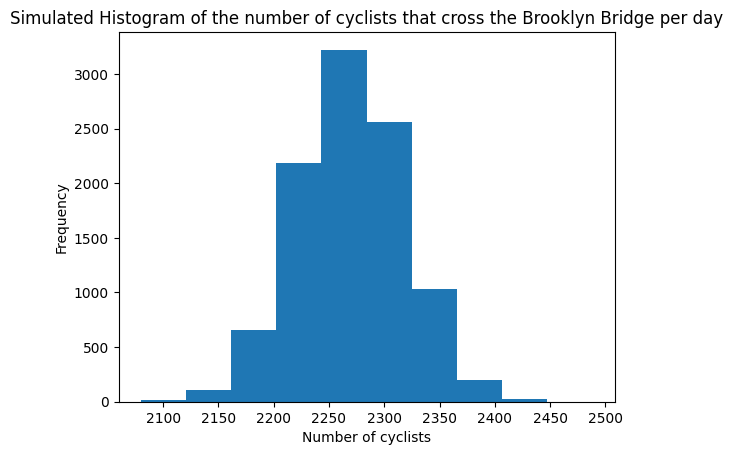

In [ ]:
# 2. Simulating the number of cyclists using Poisson distribution (10,000 examples)

mean = np.mean(data['Brooklyn Bridge'])
simulated_counts = np.random.poisson(mean, 10000)
plt.hist(simulated_counts, 10)
plt.title("Simulated Histogram of the number of cyclists that cross the Brooklyn Bridge per day")
plt.xlabel("Number of cyclists")
plt.ylabel("Frequency")
plt.show()

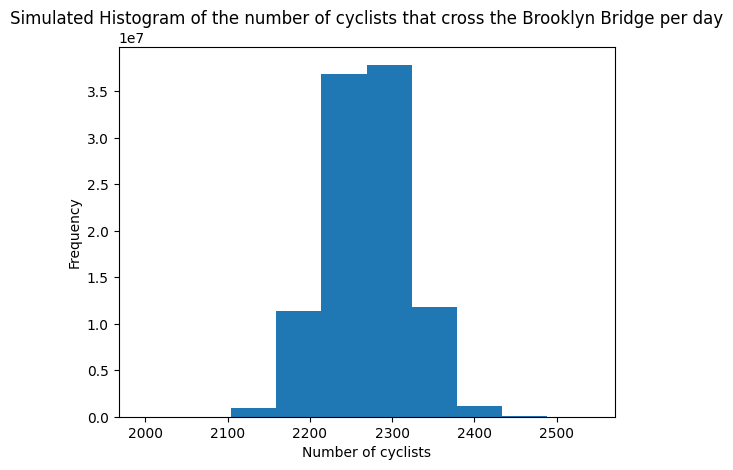

In [ ]:
# 2. Simulating the number of cyclists using Poisson distribution (10,000,000 examples)

mean = np.mean(data['Brooklyn Bridge'])
simulated_counts = np.random.poisson(mean, 100000000)
plt.hist(simulated_counts, 10)
plt.title("Simulated Histogram of the number of cyclists that cross the Brooklyn Bridge per day")
plt.xlabel("Number of cyclists")
plt.ylabel("Frequency")
plt.show()